In [1]:
import numpy as np
import os
import sys 
import pandas as pd
import matplotlib.pyplot as plt

# Append paths to utility libraries 
sys.path.append('/Users/zacharykelly/Documents/MATLAB/projects/combiExperiments/code/lightLogger/miniSpect')
import MS_util 

sys.path.append('/Users/zacharykelly/Documents/MATLAB/projects/combiExperiments/code/lightLogger/camera')
import Camera_util
import recorder as r_world


In [2]:
# Define the path to the SSD holding all of the data
path_to_ssd: str = '/Volumes/EXTERNAL1'

In [6]:
# Experiment to analyze 
experiment_name: str = 'test_0NDF_5hz'
frequency = 5
NDF = 0

In [7]:
# Find the MS readings directory
MS_readings_dir: str = os.path.join(path_to_ssd, experiment_name, 'test_MS_readings')

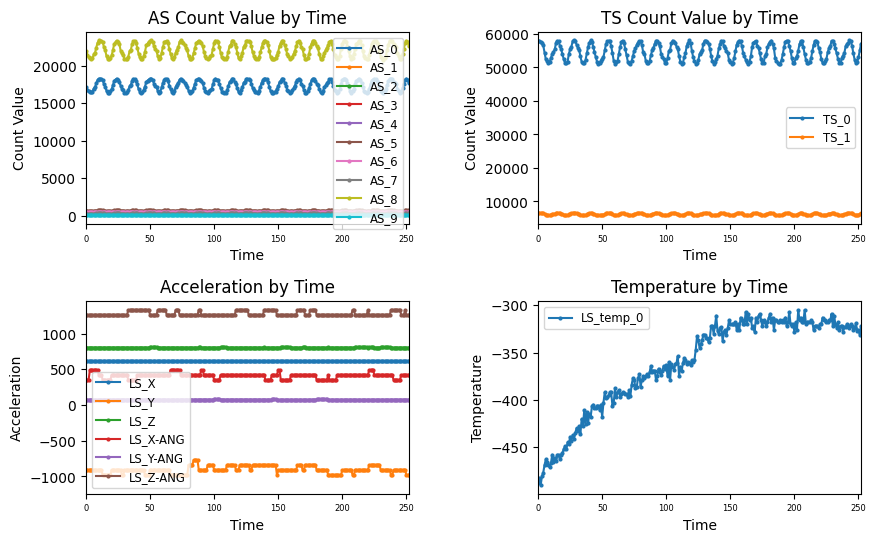

In [8]:
# Analyze the MS data
MS_util.plot_readings(MS_readings_dir)


In [9]:
# Gather the MS chip data frames to plot a single chip more in depthly 
AS_channel_df: pd.DataFrame = MS_util.reading_to_df(os.path.join(MS_readings_dir, 'AS_channels.csv'), np.uint16)
TS_channel_df: pd.DataFrame = MS_util.reading_to_df(os.path.join(MS_readings_dir, 'TS_channels.csv'), np.uint16)

In [ ]:
# Plot an 
fig, (ax1, ax2) = plt.subplots(1,2)

TS_fit_info = Camera_util.fit_source_modulation(TS_channel_df['0'].to_numpy(), NDF, frequency, ax1, fps_guess=1, fps_guess_increment=(-1,2))
AS_fit_info = Camera_util.fit_source_modulation(AS_channel_df['0'].to_numpy(), NDF, frequency, ax2, fps_guess=1, fps_guess_increment=(-1,2))

In [ ]:
# Plot an AS channel
fig, ax = plt.subplots(1,1)

MS_fit_info = Camera_util.fit_source_modulation(AS_channel_df['4'].to_numpy(), NDF, frequency, ax, fps_guess=1, fps_guess_increment=(-1,2))

In [10]:
# Find the world cam frame dir and the settings file
world_cam_dir: str = os.path.join(path_to_ssd, experiment_name, 'test_world')
world_cam_settings_file: str = os.path.join(path_to_ssd, experiment_name, 'test_world_settingsHistory.csv')

In [11]:
import importlib
importlib.reload(Camera_util)
# Load in the world cam video 
world_cam_vid: np.ndarray = Camera_util.parse_mean_frame_array(world_cam_dir)


Observed FPS: 120.11002396527081
R2: 0.9752975298437713
Amplitude: 0.2601352010394653


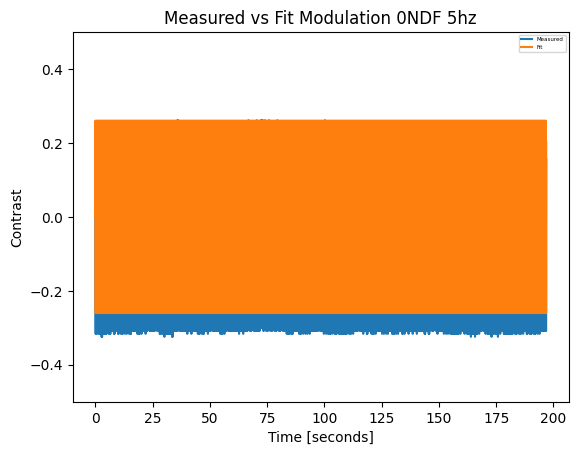

In [18]:
# Fit the world cam source modulation
fig, ax = plt.subplots(1,1)
import importlib
importlib.reload(Camera_util)
camera_fit_info = Camera_util.fit_source_modulation(world_cam_vid[120*60:], NDF, frequency, ax, fps_guess=120)

In [ ]:
# Plot the camera settings history
world_cam_settings: pd.DataFrame = r_world.parse_settings_file(world_cam_settings_file)
world_cam_settings.head

fig, gain_ax = plt.subplots(1,1)
gain_ax.set_title('Settings History')

gain_ax.plot(world_cam_settings['gain_history'])
gain_ax.set_xlabel('Frame')
gain_ax.set_ylabel('Gain', color='blue')

exposure_ax = gain_ax.twinx()
exposure_ax.plot(world_cam_settings['exposure_history'], color='orange')
exposure_ax.set_ylabel('Exposure', color='orange')

plt.show()



In [19]:
# Find the pupil cam frame directory
pupil_cam_dir: str = os.path.join(path_to_ssd, experiment_name, 'test_pupil')

In [20]:
import importlib
importlib.reload(Camera_util)
# Load in the pupil cam video 
pupil_vid: np.ndarray = Camera_util.parse_mean_frame_array(pupil_cam_dir)


Observed FPS: 90.24098477162816
R2: 0.192243172542196
Amplitude: 0.5007923530152546


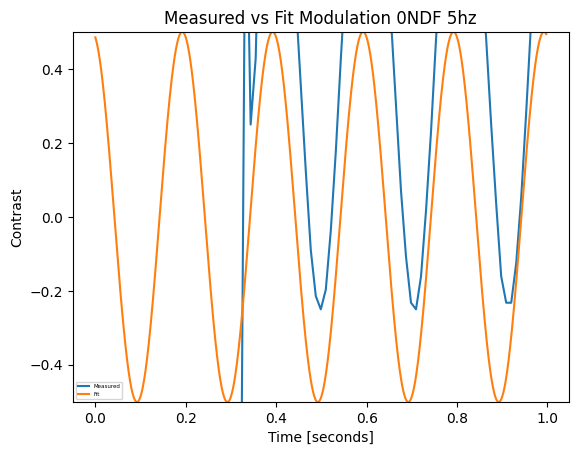

In [24]:
# Fit the pupil cam source modulation
fig, ax = plt.subplots(1,1)

pupil_fit_info = Camera_util.fit_source_modulation(pupil_vid[90:360], NDF, frequency, ax, fps_guess=90)

In [ ]:
pupil_measured, pupil_fit, pupil_phase = pupil_fit_info[-1][:2], pupil_fit_info[-1][2:], pupil_fit_info[1]

fig, ax = plt.subplots(1,1)


ax.plot(pupil_measured[0][:120], pupil_measured[1][:120], label='Pupil measured')
ax.plot(pupil_fit[0][:int(120**2)], pupil_fit[1][:int(120**2)], label='Pupil fit')

In [ ]:
# Find the sunglasses reading file 
sunglasses_file: str = os.path.join(path_to_ssd, experiment_name, '0x5_together_15min_sunglasses.csv')

In [ ]:
# Load in the sunglasses file 
sunglasses_df: pd.DataFrame = pd.read_csv(sunglasses_file, header=None, names=['sensor_val'])
sunglasses_df.head

In [ ]:
fig, ax = plt.subplots(1,1)

ax.set_title('Sunglasses Sensor Val')
ax.plot(sunglasses_df['sensor_val'])
ax.set_xlabel('Measurement')
ax.set_ylabel('Sensor Val')

plt.show()

In [16]:
# Retrieve the fits and stuff
camera_measured, camera_fit, camera_phase = camera_fit_info[-1][:2], camera_fit_info[-1][2:], camera_fit_info[1]
#MS_measured, MS_fit, MS_phase = MS_fit_info[-1][:2], MS_fit_info[-1][2:], MS_fit_info[1]



In [7]:
# Retrieve the fits and stuff
TS_measured, TS_fit, TS_phase = TS_fit_info[-1][:2], TS_fit_info[-1][2:], TS_fit_info[1]
AS_measured, AS_fit, AS_phase = AS_fit_info[-1][:2], AS_fit_info[-1][2:], AS_fit_info[1]

In [ ]:
[TS_phase, AS_phase] = np.unwrap([TS_phase, AS_phase], period=np.pi/2)

print(f'AS Phase: {AS_phase}')
print(f'TS Phase: {TS_phase}')

In [31]:
[MS_phase, camera_phase] = np.unwrap([MS_phase, camera_phase], period=np.pi/2)

In [ ]:
# First, display a minutes worth of content of the two devices superimposed onto one another
fig, ax = plt.subplots(1,1)

#ax.set_title('Camera and MS Data Superimposed')
#ax.plot(MS_measured[0][:60], MS_measured[1][:60], label='MS measured')
#ax.plot(MS_fit[0][:int(10**5.75)], MS_fit[1][:int(10**5.75)], label='MS fit')
ax.plot(camera_measured[0][:120], camera_measured[1][:120], label='Camera measured')
ax.plot(camera_fit[0][:int(120**2)], camera_fit[1][:int(120**2)], label='Camera fit')
ax.legend()


In [ ]:
# First, display a minutes worth of content of the two devices superimposed onto one another
fig, ax = plt.subplots(1,1)

ax.set_title('AS and TS Data Superimposed')
ax.plot(AS_measured[0][:60], AS_measured[1][:60], label='AS measured')
ax.plot(AS_fit[0][:int(10**5.75)], AS_fit[1][:int(10**5.75)], label='AS fit')
ax.plot(TS_measured[0][:60], TS_measured[1][:60], label='TS measured')
ax.plot(TS_fit[0][:int(60**3)], TS_fit[1][:int(60**3)], label='TS fit')
ax.legend()

In [ ]:
# Now, align the data 
fig, ax = plt.subplots(1,1)

phase_offset = MS_phase - camera_phase
phase_offset_seconds = phase_offset / ( 2*np.pi * frequency)

ax.set_title('Camera and AS Data Phase Aligned')
ax.plot(MS_measured[0][:60], MS_measured[1][:60], label='AS measured')
ax.plot(MS_fit[0][:int(10**5.75)], MS_fit[1][:int(10**5.75)], label='AS fit')
ax.plot(camera_measured[0][:120*60] + phase_offset_seconds, camera_measured[1][:120*60], label='Camera measured')
ax.plot(camera_fit[0][:int(120**2.75)] + phase_offset_seconds, camera_fit[1][:int(120**2.75)], label='Camera fit')
ax.legend()

print(phase_offset)
print(phase_offset_seconds)

In [ ]:
# Now, align the data 
fig, ax = plt.subplots(1,1)

phase_offset = AS_phase - TS_phase

phase_offset_seconds = phase_offset / (2*np.pi * frequency)

ax.set_title('AS and TS Data Aligned')
ax.plot(AS_measured[0][:60], AS_measured[1][:60], label='AS measured')
ax.plot(AS_fit[0][:int(10**5.75)], AS_fit[1][:int(10**5.75)], label='AS fit')
ax.plot(TS_measured[0][:60]+phase_offset_seconds, TS_measured[1][:60], label='TS measured')
ax.plot(TS_fit[0][:int(60**3)]+phase_offset, TS_fit[1][:int(60**3)], label='TS fit')
ax.legend()

print(phase_offset)
print(phase_offset_seconds)